In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D, Conv2D      
from keras.layers import MaxPooling2D       
from keras.layers import Flatten            
from keras.layers import Dense 
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split

import numpy as np

In [2]:
# Configurar TensorFlow para usar la GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], False)
    # Opcionalmente, puedes especificar cuánta memoria quieres asignar a la GPU
    tf.config.experimental.set_virtual_device_configuration(physical_devices[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])

In [3]:
#Definir rutas de las carétas que contienen las imágenes
directorio = "../../imagenes/mexh/"
img_width, img_height = 250, 250
input_shape = (img_width, img_height, 3)

#Hiperparámetros
epochs =40
batch_size = 62

In [4]:
# Configurar el generador de datos de imágenes
generador_datos = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Cargar y dividir los datos en conjuntos de entrenamiento y prueba
generador_entrenamiento = generador_datos.flow_from_directory(
    directorio,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

generador_prueba = generador_datos.flow_from_directory(
    directorio,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [5]:
# Definir el modelo CNN
clasificador = Sequential()

clasificador.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
clasificador.add(MaxPooling2D(pool_size=(2, 2)))
clasificador.add(Conv2D(64, (3, 3), activation='relu'))
clasificador.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de aplanamiento
clasificador.add(Flatten())

# Se agregan las capas densas
clasificador.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.0001)))
clasificador.add(Dropout(rate=0.5))
#clasificador.add(Dense(units=4, activation='relu', kernel_regularizer=l2(0.001)))
#clasificador.add(Dense(units=8, activation='relu', kernel_regularizer=l2(0.001)))
#clasificador.add(Dropout(rate=0.5))
#clasificador.add(Dense(units=16, activation='relu'))
#clasificador.add(Dropout(rate=0.5))

# Capa de salida
clasificador.add(Dense(units=1, activation='sigmoid'))

In [6]:
# Compilar el modelo
clasificador.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
clasificador.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 238144)            0         
                                                                 
 dense (Dense)               (None, 32)                7

In [8]:


# Entrenar el modelo
history = clasificador.fit(
    generador_entrenamiento,
    steps_per_epoch=generador_entrenamiento.samples // batch_size,
    epochs=epochs,
    validation_data=generador_prueba,
    validation_steps=generador_prueba.samples // batch_size
)

Epoch 1/40
51/51 [==============================] - 24s 370ms/step - loss: 0.7003 - accuracy: 0.5080 - val_loss: 0.6880 - val_accuracy: 0.5605
Epoch 2/40
51/51 [==============================] - 17s 325ms/step - loss: 0.6837 - accuracy: 0.5631 - val_loss: 0.6808 - val_accuracy: 0.6922
Epoch 3/40
51/51 [==============================] - 19s 364ms/step - loss: 0.6841 - accuracy: 0.5717 - val_loss: 0.6785 - val_accuracy: 0.6976
Epoch 4/40
51/51 [==============================] - 17s 334ms/step - loss: 0.6785 - accuracy: 0.5758 - val_loss: 0.6702 - val_accuracy: 0.6815
Epoch 5/40
 2/51 [>.............................] - ETA: 14s - loss: 0.6800 - accuracy: 0.6048

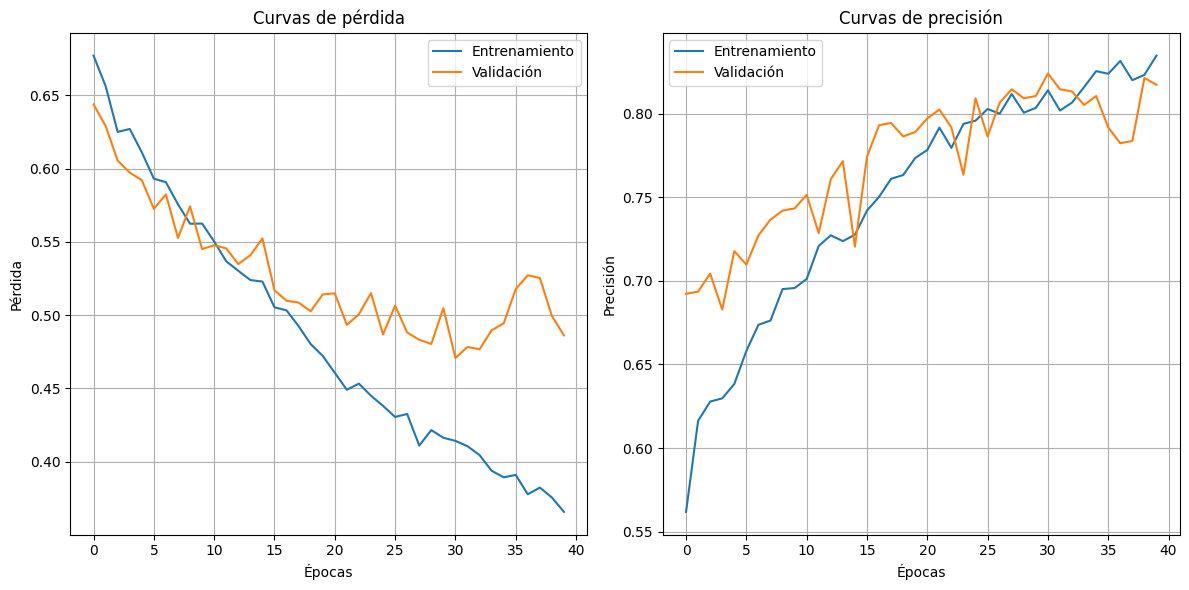

In [ ]:
import matplotlib.pyplot as plt

# Graficar las curvas de pérdida y precisión durante el entrenamiento y la validación
plt.figure(figsize=(12, 6))

# Curvas de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curvas de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

# Curvas de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curvas de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()